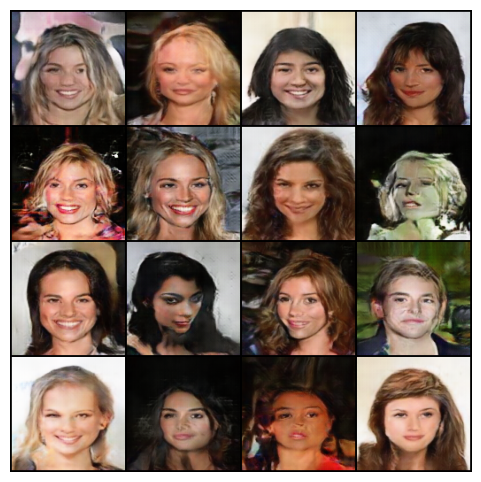

In [29]:
import torch
import torchvision
import matplotlib.pyplot as plt
from model import Generator128

BATCH_SIZE = 16
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

model = Generator128(100, 3, 64).to(DEVICE)
checkpoint = torch.load("model\gan_fft_128_16.pt")

model.load_state_dict(checkpoint['generator'])

with torch.no_grad():
    fixed_noise = torch.randn((BATCH_SIZE, 100, 1, 1), device=DEVICE)
    fake = model(fixed_noise)

img_grid_fake = torchvision.utils.make_grid(fake, nrow=4, normalize=True)

plt.figure(figsize=(6, 6)) 
plt.imshow(img_grid_fake.permute(1, 2, 0).cpu().numpy())
plt.axis("off")
plt.savefig("output6.jpg")
plt.show()